# Importing Libraries

In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit-learn for machine learning models and preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, brier_score_loss

# TensorFlow/Keras for deep learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# For custom base classifier
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


# Considering Dataset

**About the Dataset**

**Introduction:**  
This dataset provides detailed insights into factors influencing hiring decisions. Each record represents a candidate, encompassing various attributes considered during the hiring process. The dataset's primary goal is to predict the hiring outcome based on these attributes.

**Key Features and Variables:**  
- **Age:** Age of the candidate (20-50 years, Integer).  
- **Gender:** Candidate’s gender (Male: 0, Female: 1, Binary).  
- **Education Level:** Highest education attained (Bachelor's, Master's, PhD, Categorical).  
- **Experience Years:** Professional experience in years (0-15 years, Integer).  
- **Previous Companies Worked:** Number of previous companies (1-5 companies, Integer).  
- **Distance From Company:** Distance from residence to company in kilometers (1-50 km, Float).  
- **Interview Score:** Candidate’s interview performance score (0-100, Integer).  
- **Skill Score:** Technical skill assessment score (0-100, Integer).  
- **Personality Score:** Personality traits evaluation score (0-100, Integer).  
- **Recruitment Strategy:** Approach adopted by hiring team (Aggressive, Moderate, Conservative, Categorical).  
- **Hiring Decision:** Final outcome (Hired: 1, Not Hired: 0, Binary).  

**Dataset Information:**  
- **Total Records:** 1500  
- **Features:** 10 attributes  
- **Target Variable:** Hiring Decision (Binary)  

In [2]:
# Load the dataset
df = pd.read_csv('recruitment_data.csv')

In [3]:
print(df.corr())

                          Age    Gender  EducationLevel  ExperienceYears  \
Age                  1.000000  0.011286        0.032610         0.024780   
Gender               0.011286  1.000000        0.009676        -0.028502   
EducationLevel       0.032610  0.009676        1.000000        -0.000951   
ExperienceYears      0.024780 -0.028502       -0.000951         1.000000   
PreviousCompanies   -0.032580 -0.061915        0.007367         0.015784   
DistanceFromCompany -0.021031  0.003822        0.020600         0.007920   
InterviewScore      -0.025579 -0.020887        0.012807        -0.051701   
SkillScore          -0.008068  0.012333       -0.043367         0.006323   
PersonalityScore     0.037727  0.023729        0.031115         0.013891   
RecruitmentStrategy  0.018064 -0.023753       -0.036923         0.029603   
HiringDecision       0.001850 -0.002249        0.236710         0.122494   

                     PreviousCompanies  DistanceFromCompany  InterviewScore  \
Age     

# Checking Dataset

In [4]:
# Display the first few rows to understand the structure of the data
print("Initial Data:")
print(df.head())

Initial Data:
   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [6]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [7]:
# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


# Preprocessing

This code handles missing data in a dataset using the **SimpleImputer** class from the `sklearn.impute` module.  

1. **Identification of Columns:**  
   - **Numerical Columns:** Identified based on their data types (`float64` and `int64`).  
   - **Categorical Columns:** Explicitly defined based on prior understanding of the dataset (`Gender`, `EducationLevel`, `RecruitmentStrategy`, `HiringDecision`).  

2. **Missing Value Imputation:**  
   - **Numerical Columns:** Missing values are replaced with the **median** of the respective columns.  
   - **Categorical Columns:** Missing values are replaced with the **mode** (most frequent value) of the respective columns.  

This approach ensures that missing data is appropriately handled for both numerical and categorical features, preserving the dataset's integrity for further analysis or modeling.

In [8]:
from sklearn.impute import SimpleImputer

# Assuming `df` is the DataFrame with your dataset

# Identifying numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Identifying categorical columns
# Explicitly defining categorical columns based on the data understanding
cat_cols = ['Gender', 'EducationLevel', 'RecruitmentStrategy', 'HiringDecision']

# Check the columns identified as categorical
print("\nCategorical Columns:", cat_cols)

# Create an imputer for numerical columns to fill missing values with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Create an imputer for categorical columns to fill missing values with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])



Categorical Columns: ['Gender', 'EducationLevel', 'RecruitmentStrategy', 'HiringDecision']


In [9]:
# Verify if any missing values remain
print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values After Imputation:
Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   float64
 1   Gender               1500 non-null   float64
 2   EducationLevel       1500 non-null   float64
 3   ExperienceYears      1500 non-null   float64
 4   PreviousCompanies    1500 non-null   float64
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   float64
 7   SkillScore           1500 non-null   float64
 8   PersonalityScore     1500 non-null   float64
 9   RecruitmentStrategy  1500 non-null   float64
 10  HiringDecision       1500 non-null   float64
dtypes: float64(11)
memory usage: 129.0 KB


This code performs encoding for categorical variables and visualizes the distribution of the target variable in the dataset.  

1. **Label Encoding of Categorical Features:**  
   - The categorical features `EducationLevel` and `RecruitmentStrategy` are encoded into numerical values using the `LabelEncoder` from `sklearn.preprocessing`.  
   - This transformation converts categorical labels into integers, making them suitable for machine learning algorithms.  

2. **Visualization of the Target Variable:**  
   - A count plot is created using `seaborn` to display the distribution of the target variable, `HiringDecision`.  
   - The plot highlights the frequency of each category (e.g., Hired vs. Not Hired) to provide an overview of class balance.  

The combination of encoding and visualization helps prepare the data for machine learning models and assesses the target variable's distribution.

/var/folders/xx/d4y5bsbx2210fv9gdbdqc8s80000gn/T/ipykernel_41369/3943427372.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HiringDecision', data=df, palette='coolwarm')


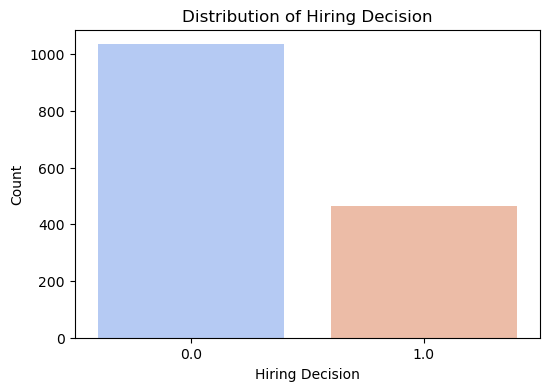

In [11]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df` is the DataFrame with your dataset

# Encode the categorical variables
# 'EducationLevel' and 'RecruitmentStrategy' are categorical features, so we can use LabelEncoder to convert them into numerical form
label_encoder = LabelEncoder()

# Encoding categorical columns
df['EducationLevel'] = label_encoder.fit_transform(df['EducationLevel'])
df['RecruitmentStrategy'] = label_encoder.fit_transform(df['RecruitmentStrategy'])

# Display the distribution of the target variable 'HiringDecision'
plt.figure(figsize=(6, 4))
sns.countplot(x='HiringDecision', data=df, palette='coolwarm')
plt.title('Distribution of Hiring Decision')
plt.xlabel('Hiring Decision')
plt.ylabel('Count')
plt.show()


This code prepares the dataset for correlation analysis and visualizes the relationships between features using a heatmap.  

1. **Encoding Categorical Variables:**  
   - Converts categorical features (`Gender`, `EducationLevel`, `RecruitmentStrategy`) into numerical format using `astype('category').cat.codes`.  
   - This step ensures that categorical variables are suitable for correlation calculation.  

2. **Correlation Matrix Calculation:**  
   - Computes the pairwise Pearson correlation coefficients between numerical variables, including the encoded categorical features.  

3. **Heatmap Visualization:**  
   - A heatmap is generated using `seaborn` to visually represent the strength and direction of correlations between features.  
   - Annotations show the exact correlation values, and a diverging `coolwarm` color palette highlights positive and negative relationships.  

This analysis helps identify significant relationships between features, which can guide feature selection and model development.

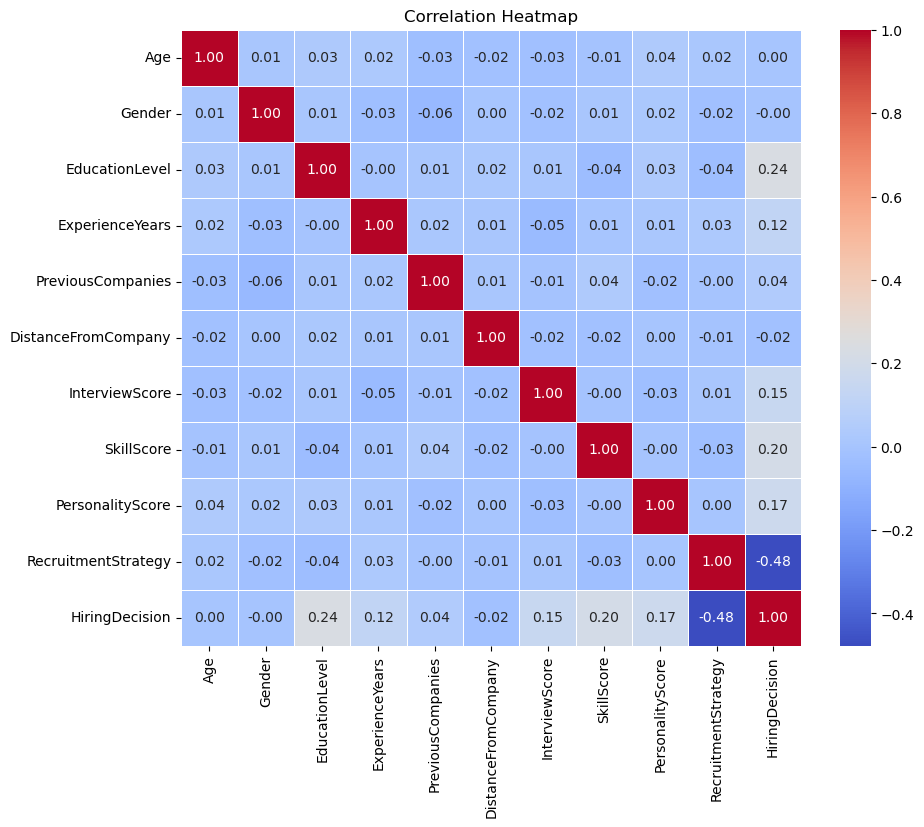

In [12]:
# Assuming `df` is the DataFrame with your dataset

# Encode categorical variables before calculating the correlation matrix
# Encoding categorical columns
df['Gender'] = df['Gender'].astype('category').cat.codes  # Encoding binary categorical 'Gender'
df['EducationLevel'] = df['EducationLevel'].astype('category').cat.codes  # Encoding 'EducationLevel'
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].astype('category').cat.codes  # Encoding 'RecruitmentStrategy'

# Calculate the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


This code generates a pairwise plot to visualize the relationships between features in the dataset, with color differentiation based on the target variable, `HiringDecision`. Using `seaborn`'s `pairplot()`, it creates scatter plots for feature pairs and KDE plots on the diagonal for feature distributions. The `hue='HiringDecision'` parameter highlights class distinctions, while the `palette='coolwarm'` enhances visual contrast. This visualization helps identify correlations, feature interactions, and patterns that may influence the target variable, supporting further analysis and model development.

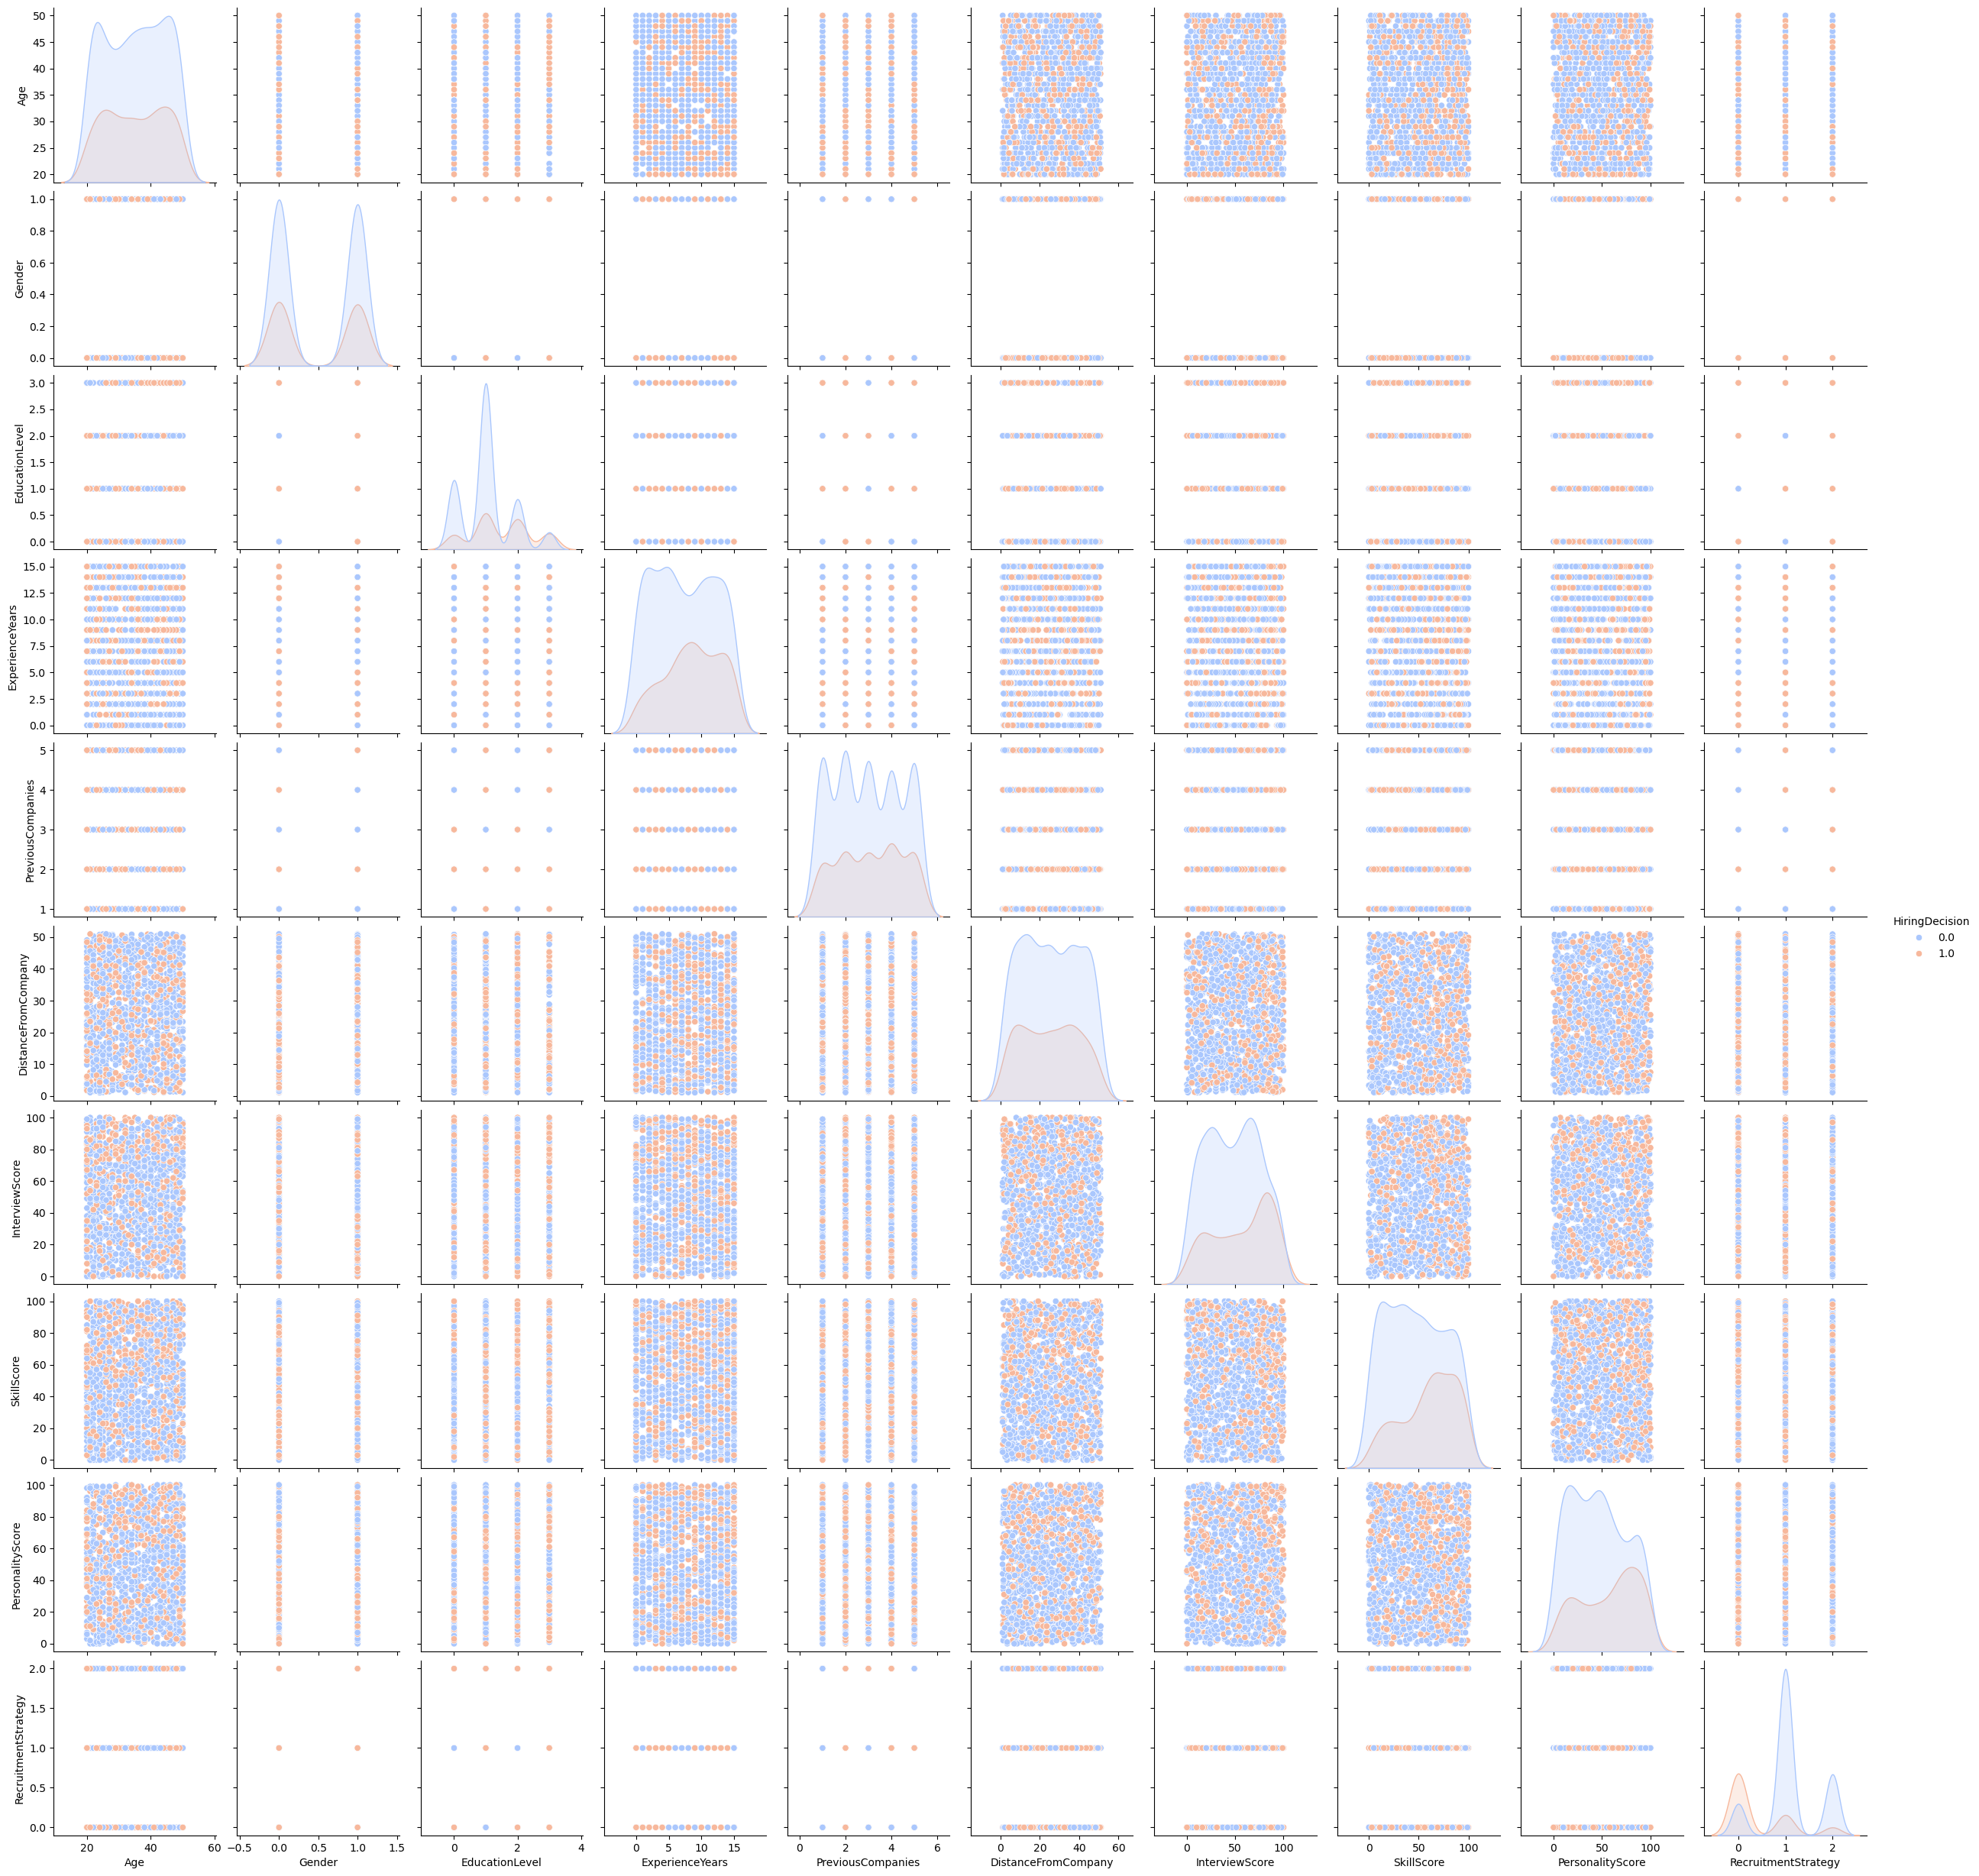

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize pairwise relationships for the features
sns.pairplot(df, hue='HiringDecision', diag_kind='kde', palette='coolwarm')
plt.show()


1. **Encoding Categorical Variables:**  
   The categorical variables (`Gender`, `EducationLevel`, `RecruitmentStrategy`) are encoded into numerical values using `astype('category').cat.codes`. This converts these features into a format suitable for machine learning models.  

2. **Data Splitting:**  
   The dataset is split into features (`X`) and target (`y`) variables. The `train_test_split()` function divides the data into training and testing sets, with 30% allocated for testing and 70% for training.  

3. **Feature Scaling:**  
   The `StandardScaler` is used to standardize the feature values, ensuring they have a mean of 0 and a standard deviation of 1. This transformation is applied to both the training and testing sets.  

4. **Display:**  
   The first five rows of the scaled training data are displayed to verify the transformation. The code concludes by indicating that the data is ready for model development.  

This preprocessing ensures that the dataset is appropriately prepared for subsequent machine learning tasks, particularly those that are sensitive to feature scales.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Encode categorical variables before splitting the data
df['Gender'] = df['Gender'].astype('category').cat.codes  # Encoding 'Gender'
df['EducationLevel'] = df['EducationLevel'].astype('category').cat.codes  # Encoding 'EducationLevel'
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].astype('category').cat.codes  # Encoding 'RecruitmentStrategy'

# Splitting the dataset into features (X) and target (y)
X = df.drop(columns=['HiringDecision'])  # Dropping the target column
y = df['HiringDecision']  # The target variable

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled data
print("\nScaled Data (First 5 rows of X_train_scaled):")
print(X_train_scaled[:5])

# Now, the data is preprocessed, and we can move on to model development
# For now, we'll just show the summary of the preprocessing
print("\nPreprocessing Complete. Data is ready for modeling.")




Scaled Data (First 5 rows of X_train_scaled):
[[ 0.22038632  1.01729235 -0.23894432  1.55146027  1.40684322 -0.16970786
  -1.48344459  0.47422282  0.55983859  0.14678193]
 [-0.32028106 -0.98300159 -0.23894432  1.55146027  1.40684322  0.02058879
  -0.53466387  0.13709759  1.33963452 -1.2936015 ]
 [ 0.11225285  1.01729235 -0.23894432  0.48715001 -0.70744883  1.47834811
  -1.62400469 -1.1776908  -0.35557403 -1.2936015 ]
 [-0.32028106  1.01729235 -1.38982295  1.55146027  1.40684322  0.7167328
   1.71429783  0.84506057  1.61086789  0.14678193]
 [-1.07721539 -0.98300159 -1.38982295  1.12573617 -0.00268482  0.76097003
  -1.13204432 -1.11026575 -1.64393253  0.14678193]]

Preprocessing Complete. Data is ready for modeling.


Splitting the dataset - train and test

In [15]:
# Encode categorical variables before splitting the data
df['Gender'] = df['Gender'].astype('category').cat.codes  # Encoding 'Gender'
df['EducationLevel'] = df['EducationLevel'].astype('category').cat.codes  # Encoding 'EducationLevel'
df['RecruitmentStrategy'] = df['RecruitmentStrategy'].astype('category').cat.codes  # Encoding 'RecruitmentStrategy'

# Load and preprocess your dataset
X_features = df.drop('HiringDecision', axis=1)  # Features (predictors), updated to target 'HiringDecision'
y_target = df['HiringDecision']  # Target variable (HiringDecision), updated from 'default'

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_target, test_size=0.2, random_state=42)

# Convert y_train to numpy array
y_train = y_train.to_numpy()

# Display the split data shapes (optional)
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Test target shape: {y_test.shape}")


Training features shape: (1200, 10)
Test features shape: (300, 10)
Training target shape: (1200,)
Test target shape: (300,)


# *Models Considered for Comparison :*

1) Random Forest

2) SVM

3) Decision tree

4) LSTM

# Random Forest Classifier

### Hyperparameter Tuning

In [16]:
# Define the model and parameter grid for hyperparameter tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_rf_model = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


### Model Creation, Kfold cross validation and Calculate metrics

In [17]:
# KFold Cross-validation setup
cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare to store results in a DataFrame
metrics_per_fold = []

# Perform 10-Fold Cross-validation
for fold_number, (train_idx, val_idx) in enumerate(cv_strategy.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Fit model on the fold
    best_rf_model.fit(X_train_fold, y_train_fold)
    y_pred = best_rf_model.predict(X_val_fold)
    y_proba = best_rf_model.predict_proba(X_val_fold)[:, 1]

    # Calculate confusion matrix components
    # Initialize counters for confusion matrix
    tp = tn = fp = fn = 0
    
    # Calculate TP, TN, FP, FN
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    # Calculate metrics
    true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0
    true_negative_rate = tn / (tn + fp) if (tn + fp) > 0 else 0
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score = 2 * precision * true_positive_rate / (precision + true_positive_rate) if (precision + true_positive_rate) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    error_rate = 1 - accuracy
    balanced_accuracy = (true_positive_rate + true_negative_rate) / 2
    true_skill_statistic = true_positive_rate + true_negative_rate - 1
    heidke_skill_score = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    brier_score = brier_score_loss(y_val_fold, y_proba)
    auc_score = roc_auc_score(y_val_fold, y_proba)
    
    # Append metrics for each fold
    metrics_per_fold.append([fold_number, tp, tn, fp, fn, true_positive_rate, true_negative_rate, false_positive_rate,
                             false_negative_rate, precision, f1_score, accuracy, error_rate, balanced_accuracy, 
                             true_skill_statistic, heidke_skill_score, brier_score, auc_score])

# Create DataFrame with fold metrics
metrics_rf = pd.DataFrame(metrics_per_fold, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC', 'TSS', 'HSS', 
    'Brier_score', 'AUC'
])

# Display results per fold and calculate average metrics across all folds
metrics_rf.loc['Average'] = metrics_rf.mean(numeric_only=True)
print(metrics_rf)


         Fold    TP    TN   FP    FN       TPR       TNR       FPR       FNR  \
0         1.0  32.0  79.0  4.0   5.0  0.864865  0.951807  0.048193  0.135135   
1         2.0  29.0  78.0  5.0   8.0  0.783784  0.939759  0.060241  0.216216   
2         3.0  28.0  82.0  2.0   8.0  0.777778  0.976190  0.023810  0.222222   
3         4.0  30.0  85.0  2.0   3.0  0.909091  0.977011  0.022989  0.090909   
4         5.0  28.0  80.0  6.0   6.0  0.823529  0.930233  0.069767  0.176471   
5         6.0  34.0  78.0  1.0   7.0  0.829268  0.987342  0.012658  0.170732   
6         7.0  32.0  73.0  3.0  12.0  0.727273  0.960526  0.039474  0.272727   
7         8.0  35.0  78.0  2.0   5.0  0.875000  0.975000  0.025000  0.125000   
8         9.0  36.0  77.0  1.0   6.0  0.857143  0.987179  0.012821  0.142857   
9        10.0  34.0  81.0  3.0   2.0  0.944444  0.964286  0.035714  0.055556   
Average   5.5  31.8  79.1  2.9   6.2  0.839218  0.964933  0.035067  0.160782   

         Precision  F1_measure  Accurac

### ROC Curve

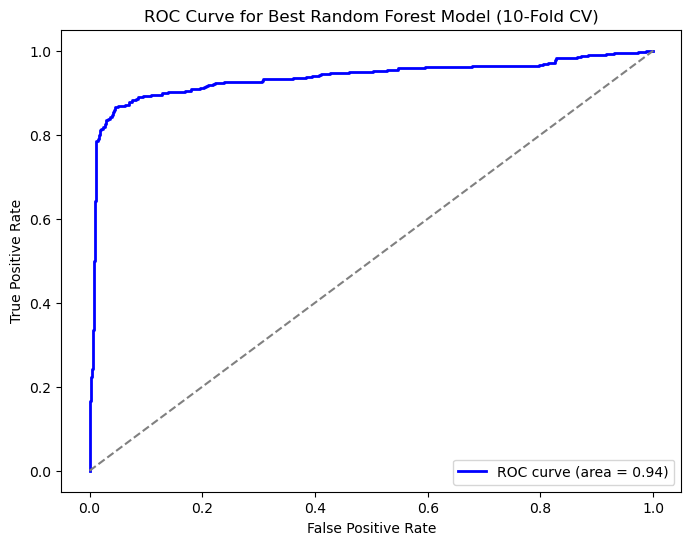

Average ROC AUC Score across folds: 0.94


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold

# KFold Cross-validation setup
cv_strategy = KFold(n_splits=10, shuffle=True, random_state=42)

# Aggregate true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

for train_idx, val_idx in cv_strategy.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Fit the model and predict probabilities
    best_rf_model.fit(X_train_fold, y_train_fold)
    y_proba = best_rf_model.predict_proba(X_val_fold)[:, 1]
    
    # Append the results to the lists
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for further calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Random Forest Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

# Print the ROC AUC score
print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")

# SVM
### Hyperparameter Tuning

In [19]:
# Define the model and parameter grid for hyperparameter tuning
svm = SVC(probability=True, random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best SVM model
best_svm = grid_search.best_estimator_

# Print the best parameters found by GridSearchCV
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


### Model Creation, Kfold cross validation and Calculate metrics

In [20]:
# KFold Cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare to store results in a DataFrame
metrics_list = []

# Perform 10-Fold Cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Fit model on the fold
    best_svm.fit(X_train_fold, y_train_fold)
    y_pred = best_svm.predict(X_val_fold)
    y_proba = best_svm.predict_proba(X_val_fold)[:, 1]

    # Calculate confusion matrix components
    # Initialize counters for confusion matrix
    tp = tn = fp = fn = 0
    
    # Calculate TP, TN, FP, FN
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    # Calculate metrics
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
    FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
    Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    F1 = 2 * Precision * TPR / (Precision + TPR) if (Precision + TPR) > 0 else 0
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Error_rate = 1 - Accuracy
    BACC = (TPR + TNR) / 2
    TSS = TPR + TNR - 1
    HSS = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    Brier_score = brier_score_loss(y_val_fold, y_proba)
    AUC = roc_auc_score(y_val_fold, y_proba)
    
    # Append metrics for each fold
    metrics_list.append([fold, tp, tn, fp, fn, TPR, TNR, FPR, FNR, Precision, F1, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Create DataFrame with fold metrics
metrics_svm = pd.DataFrame(metrics_list, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC',
    'TSS', 'HSS', 'Brier_score', 'AUC'
])

# Display results per fold and calculate average metrics across all folds
metrics_svm.loc['Average'] = metrics_svm.mean(numeric_only=True)
print(metrics_svm)


         Fold    TP    TN    FP    FN       TPR       TNR       FPR       FNR  \
0         1.0  23.0  77.0   6.0  14.0  0.621622  0.927711  0.072289  0.378378   
1         2.0  25.0  75.0   8.0  12.0  0.675676  0.903614  0.096386  0.324324   
2         3.0  25.0  76.0   8.0  11.0  0.694444  0.904762  0.095238  0.305556   
3         4.0  29.0  83.0   4.0   4.0  0.878788  0.954023  0.045977  0.121212   
4         5.0  24.0  76.0  10.0  10.0  0.705882  0.883721  0.116279  0.294118   
5         6.0  32.0  78.0   1.0   9.0  0.780488  0.987342  0.012658  0.219512   
6         7.0  27.0  71.0   5.0  17.0  0.613636  0.934211  0.065789  0.386364   
7         8.0  29.0  76.0   4.0  11.0  0.725000  0.950000  0.050000  0.275000   
8         9.0  32.0  75.0   3.0  10.0  0.761905  0.961538  0.038462  0.238095   
9        10.0  29.0  78.0   6.0   7.0  0.805556  0.928571  0.071429  0.194444   
Average   5.5  27.5  76.5   5.5  10.5  0.726300  0.933549  0.066451  0.273700   

         Precision  F1_meas

### ROC Curve

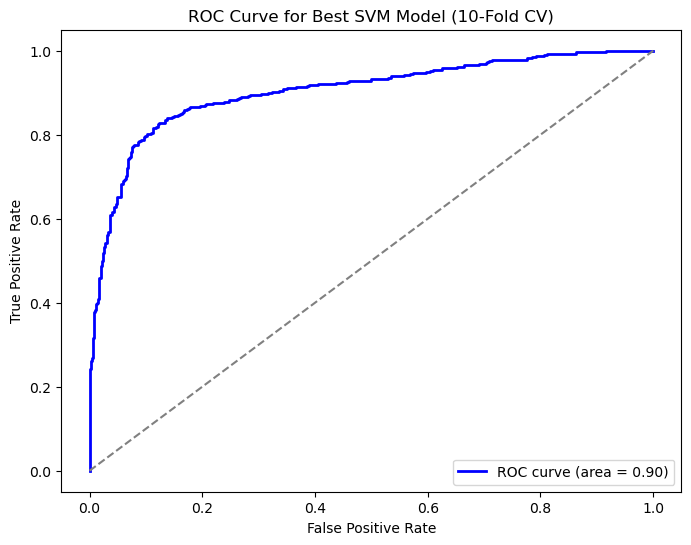

Average ROC AUC Score across folds: 0.90


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold

# KFold Cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Aggregate true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

# Perform 10-Fold Cross-validation
for train_idx, val_idx in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Fit the model on each fold
    best_svm.fit(X_train_fold, y_train_fold)
    
    # Predict probabilities for each fold
    y_proba = best_svm.predict_proba(X_val_fold)[:, 1]
    
    # Append the true labels and predicted probabilities to the lists
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for further calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best SVM Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

# Print the average ROC AUC score across folds
print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")


# Decision Tree
### Hyperparameter Tuning

In [22]:
# Define the Decision Tree model and parameter grid for hyperparameter tuning
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 5, 10]  # Minimum samples required to be at a leaf node
}

# Hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best decision tree model after hyperparameter tuning
best_dt = grid_search.best_estimator_

# Print the best model and its parameters
print(f"Best Decision Tree Model: {best_dt}")

Best Decision Tree Model: DecisionTreeClassifier(min_samples_leaf=10, random_state=42)


### Model Creation, Kfold cross validationa and metrics

In [23]:
# KFold Cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Prepare to store results in a list
metrics_list = []

# Perform 10-Fold Cross-validation
for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Fit the model on the training data of the current fold
    best_dt.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation data
    y_pred = best_dt.predict(X_val_fold)
    y_proba = best_dt.predict_proba(X_val_fold)[:, 1]

    # Calculate confusion matrix components
    # Initialize counters for confusion matrix
    tp = tn = fp = fn = 0
    
    # Calculate TP, TN, FP, FN
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    # Calculate performance metrics
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
    FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
    Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    F1 = 2 * Precision * TPR / (Precision + TPR) if (Precision + TPR) > 0 else 0
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Error_rate = 1 - Accuracy
    BACC = (TPR + TNR) / 2
    TSS = TPR + TNR - 1
    HSS = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    Brier_score = brier_score_loss(y_val_fold, y_proba)
    AUC = roc_auc_score(y_val_fold, y_proba)
    
    # Append the metrics for the current fold
    metrics_list.append([fold, tp, tn, fp, fn, TPR, TNR, FPR, FNR, Precision, F1, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Create a DataFrame from the metrics list
metrics_dt = pd.DataFrame(metrics_list, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC',
    'TSS', 'HSS', 'Brier_score', 'AUC'
])

# Display the metrics per fold and the average of each metric across all folds
metrics_dt.loc['Average'] = metrics_dt.mean(numeric_only=True)
print(metrics_dt)


         Fold    TP    TN   FP    FN       TPR       TNR       FPR       FNR  \
0         1.0  32.0  78.0  5.0   5.0  0.864865  0.939759  0.060241  0.135135   
1         2.0  28.0  80.0  3.0   9.0  0.756757  0.963855  0.036145  0.243243   
2         3.0  30.0  80.0  4.0   6.0  0.833333  0.952381  0.047619  0.166667   
3         4.0  27.0  84.0  3.0   6.0  0.818182  0.965517  0.034483  0.181818   
4         5.0  29.0  78.0  8.0   5.0  0.852941  0.906977  0.093023  0.147059   
5         6.0  35.0  78.0  1.0   6.0  0.853659  0.987342  0.012658  0.146341   
6         7.0  36.0  73.0  3.0   8.0  0.818182  0.960526  0.039474  0.181818   
7         8.0  33.0  77.0  3.0   7.0  0.825000  0.962500  0.037500  0.175000   
8         9.0  31.0  76.0  2.0  11.0  0.738095  0.974359  0.025641  0.261905   
9        10.0  33.0  83.0  1.0   3.0  0.916667  0.988095  0.011905  0.083333   
Average   5.5  31.4  78.7  3.3   6.6  0.827768  0.960131  0.039869  0.172232   

         Precision  F1_measure  Accurac

### ROC Curve

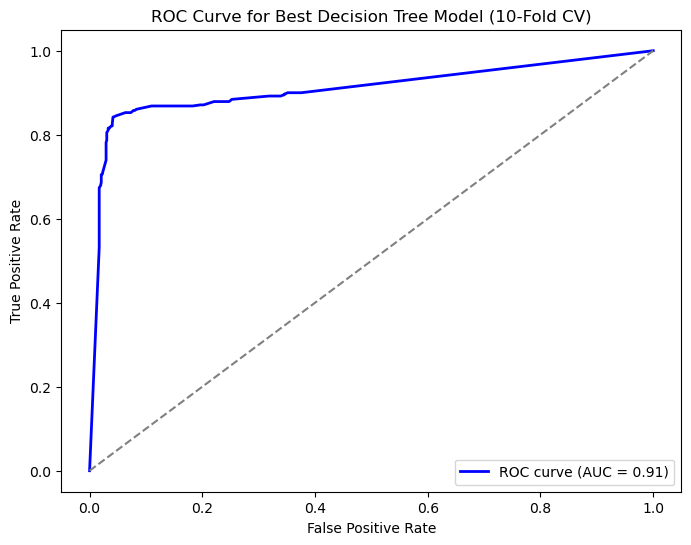

Average ROC AUC Score across folds: 0.91


In [24]:
# KFold Cross-validation setup
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Aggregate true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

# Perform 10-Fold Cross-validation with the best Decision Tree model
for train_idx, val_idx in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
    
    # Fit the model on the training fold
    best_dt.fit(X_train_fold, y_train_fold)
    y_proba = best_dt.predict_proba(X_val_fold)[:, 1]  # Get probability for positive class
    
    # Store the true labels and predicted probabilities for the validation fold
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best Decision Tree Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")


# LSTM

### Model Creation, Hyperparameter tuning, kfold cross validation and metrics

In [25]:
# Encode 'Gender' (binary) and 'EducationLevel' (ordinal)
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['EducationLevel'] = label_encoder.fit_transform(df['EducationLevel'])
df['RecruitmentStrategy'] = label_encoder.fit_transform(df['RecruitmentStrategy'])

# Separate features and target
X = df.drop('HiringDecision', axis=1).values  # Use 'HiringDecision' as target variable
y = df['HiringDecision'].values

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape data for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Define custom Keras model wrapper
class KerasLSTMClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, learning_rate=0.001, dropout_rate=0.2, epochs=20, batch_size=32):
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None
    
    def fit(self, X, y):
        self.model = self.create_lstm_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=0)
        return self
    
    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32").flatten()
    
    def create_lstm_model(self):
        model = Sequential()
        model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))
        model.add(Dropout(self.dropout_rate))
        model.add(Dense(1, activation='sigmoid'))
        optimizer = Adam(learning_rate=self.learning_rate)
        model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
        return model

# Create the KerasLSTMClassifier
model = KerasLSTMClassifier()

# Define hyperparameters grid to tune
param_grid = {
    'learning_rate': [0.001, 0.01],
    'dropout_rate': [0.2, 0.3],
}

# Set up GridSearchCV with 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_result = grid_search.fit(X, y)

# Get the best hyperparameters
best_params = grid_result.best_params_
print(f"Best Hyperparameters: {best_params}")

# Best model with the best hyperparameters
best_model = grid_result.best_estimator_

# Evaluate the best model with 10-fold cross-validation
metrics_list = []

for fold, (train_idx, val_idx) in enumerate(cv.split(X, y), 1):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Train the model
    best_model.fit(X_train_fold, y_train_fold)
    
    # Predict on the validation fold
    y_pred = best_model.predict(X_val_fold)
    y_proba = best_model.model.predict(X_val_fold).flatten()
    
    # Calculate confusion matrix components
    # Initialize counters for confusion matrix
    tp = tn = fp = fn = 0
    
    # Calculate TP, TN, FP, FN
    for true, pred in zip(y_val_fold, y_pred):
        if true == 1 and pred == 1:
            tp += 1
        elif true == 0 and pred == 0:
            tn += 1
        elif true == 0 and pred == 1:
            fp += 1
        elif true == 1 and pred == 0:
            fn += 1
    
    # Calculate metrics
    TPR = tp / (tp + fn) if (tp + fn) > 0 else 0
    TNR = tn / (tn + fp) if (tn + fp) > 0 else 0
    FPR = fp / (fp + tn) if (fp + tn) > 0 else 0
    FNR = fn / (fn + tp) if (fn + tp) > 0 else 0
    Precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    F1 = 2 * Precision * TPR / (Precision + TPR) if (Precision + TPR) > 0 else 0
    Accuracy = (tp + tn) / (tp + tn + fp + fn)
    Error_rate = 1 - Accuracy
    BACC = (TPR + TNR) / 2
    TSS = TPR + TNR - 1
    HSS = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) if ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn)) > 0 else 0
    Brier_score = brier_score_loss(y_val_fold, y_proba)
    AUC = roc_auc_score(y_val_fold, y_proba)
    
    # Append metrics for each fold
    metrics_list.append([fold, tp, tn, fp, fn, TPR, TNR, FPR, FNR, Precision, F1, Accuracy, Error_rate, BACC, TSS, HSS, Brier_score, AUC])

# Create DataFrame with fold metrics
metrics_lstm = pd.DataFrame(metrics_list, columns=[
    'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR',
    'Precision', 'F1_measure', 'Accuracy', 'Error_rate', 'BACC',
    'TSS', 'HSS', 'Brier_score', 'AUC'
])

# Display results for only the best hyperparameters
metrics_lstm.loc['Average'] = metrics_lstm.mean(numeric_only=True)
print(metrics_lstm)


Fitting 10 folds for each of 4 candidates, totalling 40 fits


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/r

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/stepp
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pas

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/stepp
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best Hyperparameters: {'dropout_rate': 0.2, 'learning_rate': 0.01}
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 668us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step


/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step
         Fold    TP     TN    FP    FN       TPR       TNR       FPR  \
0         1.0  29.0  107.0   5.0   9.0  0.763158  0.955357  0.044643   
1         2.0  38.0   98.0   5.0   9.0  0.808511  0.951456  0.048544   
2         3.0  30.0   96.0  10.0  14.0  0.681818  0.905660  0.094340   
3         4.0  38.0   96.0   5.0  11.0  0.775510  0.950495  0.049505   
4         5.0  39.0   91.0   9.0  11.0  0.780000  0.910000  0.090000   
5         6.0  29.0  105.0   5.0  11.0  0.725000  0.954545  0.045455   
6         7.0  34.0  103.0   5.0   8.0  0.809524  0.953704  0.046296   
7         8.0  34.0   97.0   4.0  15.0  0.693878  0.960396  0.039604   
8         9.0  33.0   93.0   7.0  17.0  0.660000  0.930000  0.070000   
9        10.0  32.0   89.0   5.0  24.0  0.571429  0.946809  0.053191   
Average   5.5  33.6   97.5   6.0  12.9  0.726883  0.941842  0.058158   

              FNR  Precision  F1_measure  Accuracy  Error_

### ROC Curve

/Users/krkaushikkumar/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/stepWARNING:tensorflow:5 out of the last 16 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x30b764cc0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
5/5 ━━━━━━━━━━

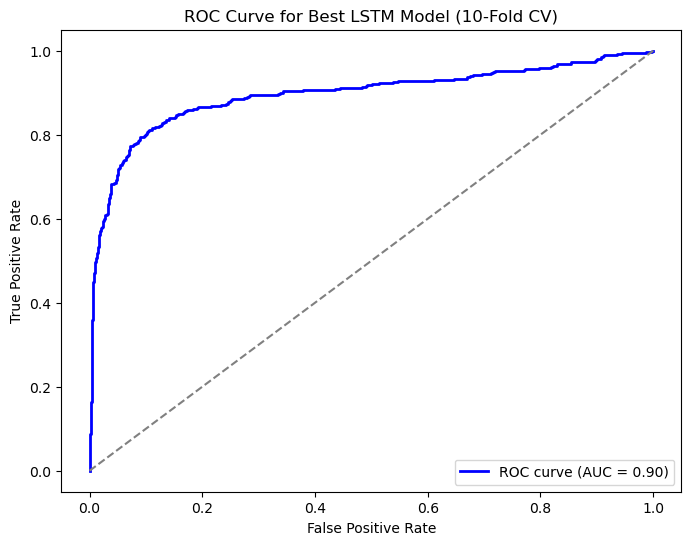

Average ROC AUC Score across folds: 0.90


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Aggregating true labels and predicted probabilities across all folds
y_true_all = []
y_proba_all = []

for train_idx, val_idx in cv.split(X, y):
    X_train_fold, X_val_fold = X[train_idx], X[val_idx]
    y_train_fold, y_val_fold = y[train_idx], y[val_idx]
    
    # Fit the best model on the training fold
    best_model.fit(X_train_fold, y_train_fold)
    
    # Get the predicted probabilities for the validation fold
    y_proba = best_model.model.predict(X_val_fold).flatten()
    
    # Store the true labels and predicted probabilities
    y_true_all.extend(y_val_fold)
    y_proba_all.extend(y_proba)

# Convert lists to numpy arrays for calculations
y_true_all = np.array(y_true_all)
y_proba_all = np.array(y_proba_all)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true_all, y_proba_all)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_proba_all)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Best LSTM Model (10-Fold CV)')
plt.legend(loc='lower right')
plt.show()

print(f"Average ROC AUC Score across folds: {roc_auc:.2f}")


# Result

1. **Adding Model Names:**
   - A new column called "Model" is added to each model's metrics DataFrame (Random Forest, SVM, Decision Tree, and LSTM). This column labels each row with the corresponding model name.

2. **Merging Metrics:**
   - The last row (which contains aggregated metrics for each model) from each model's metrics DataFrame is extracted and merged into a single DataFrame using `pd.concat`. This results in a table where each model's performance metrics are aligned for comparison.

3. **Reordering Columns:**
   - The 'Model' column is moved to the first position, making it easier to identify which metrics correspond to each model.

4. **Transposing the DataFrame:**
   - The DataFrame is transposed so that the models are the column names, and each metric is represented in a row, allowing for a more compact and readable comparison of the metrics across models.

5. **Displaying the Results:**
   - The final DataFrame is displayed, with each model’s performance metrics (e.g., accuracy, precision, F1 score, etc.) shown in a transposed format, making it easy to compare the performance of each model side by side.

This approach allows you to efficiently compare the results of different models based on the same metrics, facilitating the evaluation of which model performs the best.

In [27]:
# Add a new column to each DataFrame for the model name
metrics_rf['Model'] = 'Random Forest'
metrics_svm['Model'] = 'SVM'
metrics_dt['Model'] = 'Decision Tree'
metrics_lstm['Model'] = 'LSTM'

# Select the last row from each DataFrame and merge them vertically
merged_metrics = pd.concat([metrics_rf[-1:], metrics_svm[-1:], metrics_dt[-1:], metrics_lstm[-1:]], ignore_index=True)

# Move the 'Model' column to the first position
merged_metrics = merged_metrics[['Model'] + [col for col in merged_metrics.columns if col != 'Model']]

# Transpose the DataFrame to have models as column names
merged_metrics = merged_metrics.set_index('Model').T

# Display the DataFrame with bold model names in the first row
# Formatting the model names as bold for display (works in Jupyter environments)
merged_metrics.columns = [f"{col}" for col in merged_metrics.columns]

# Display the transposed DataFrame
merged_metrics


,Random Forest,SVM,Decision Tree,LSTM
Fold,5.500000,5.500000,5.500000,5.500000
TP,31.800000,27.500000,31.400000,33.600000
TN,79.100000,76.500000,78.700000,97.500000
FP,2.900000,5.500000,3.300000,6.000000
FN,6.200000,10.500000,6.600000,12.900000
TPR,0.839218,0.726300,0.827768,0.726883
TNR,0.964933,0.933549,0.960131,0.941842
FPR,0.035067,0.066451,0.039869,0.058158
FNR,0.160782,0.273700,0.172232,0.273117
Precision,0.915974,0.832802,0.905618,0.849222


## Model Comparison and Ranking

This step evaluates the performance of various models using key metrics and identifies the best model through a ranking system.

### Selected Key Metrics:
- **Accuracy**
- **AUC (Area Under the Curve)**
- **Precision**
- **F1-Score**
- **Balanced Accuracy (BACC)**
- **Heidke Skill Score (HSS)**

### Methodology:
1. **Metric Selection**: Key metrics were chosen to assess and compare model performance.
2. **Ranking**: Each model was ranked for all metrics, with higher values indicating superior performance (e.g., higher accuracy or AUC).
3. **Total Score Calculation**: The ranks were summed across all metrics for each model, where a lower total score denotes better overall performance.
4. **Best Model Identification**: The model with the lowest total score was recognized as the best performer.

### Results:
- **Model Rankings**: Rankings for each metric highlight comparative performance.
- **Top Model**: The model with the lowest total score is deemed the best overall.

In [28]:
# Assuming merged_metrics is the transposed DataFrame with model metrics
# Select key metrics for comparison
key_metrics = ['Accuracy', 'AUC', 'Precision', 'F1_measure', 'BACC', 'HSS']

# Filter the merged metrics DataFrame to only key metrics
metrics_for_ranking = merged_metrics.loc[key_metrics]

# Rank each model for each metric (higher is better, so we rank by descending values)
ranks = metrics_for_ranking.rank(ascending=False, axis=1)

# Sum ranks for each model to get a total score (lower score indicates better performance)
total_scores = ranks.sum()

# Find the model with the lowest total score
best_model = total_scores.idxmin()

# Display the ranking results and the best model
print("Ranking of Models by Metrics:\n", ranks)
print("\nTotal Scores for Each Model:\n", total_scores)
print(f"\nBest Model Overall: {best_model}")

Ranking of Models by Metrics:
             Random Forest  SVM  Decision Tree  LSTM
Accuracy              1.0  4.0            2.0   3.0
AUC                   1.0  3.0            2.0   4.0
Precision             1.0  4.0            2.0   3.0
F1_measure            1.0  4.0            2.0   3.0
BACC                  1.0  4.0            2.0   3.0
HSS                   1.0  4.0            2.0   3.0

Total Scores for Each Model:
 Random Forest     6.0
SVM              23.0
Decision Tree    12.0
LSTM             19.0
dtype: float64

Best Model Overall: Random Forest
